<a href="https://colab.research.google.com/github/Raihan4520/YOLO11/blob/main/Pose_Detection_YOLO11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pose Detection** using YOLO11

In [1]:
# Check GPU
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Install the necessary libraries
!pip install ultralytics roboflow opencv-python pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

Upload a image to process:


Saving 194121415_0127speed_t1200.jpg to 194121415_0127speed_t1200.jpg

0: 480x640 3 persons, 420.3ms
Speed: 22.2ms preprocess, 420.3ms inference, 38.0ms postprocess per image at shape (1, 3, 480, 640)


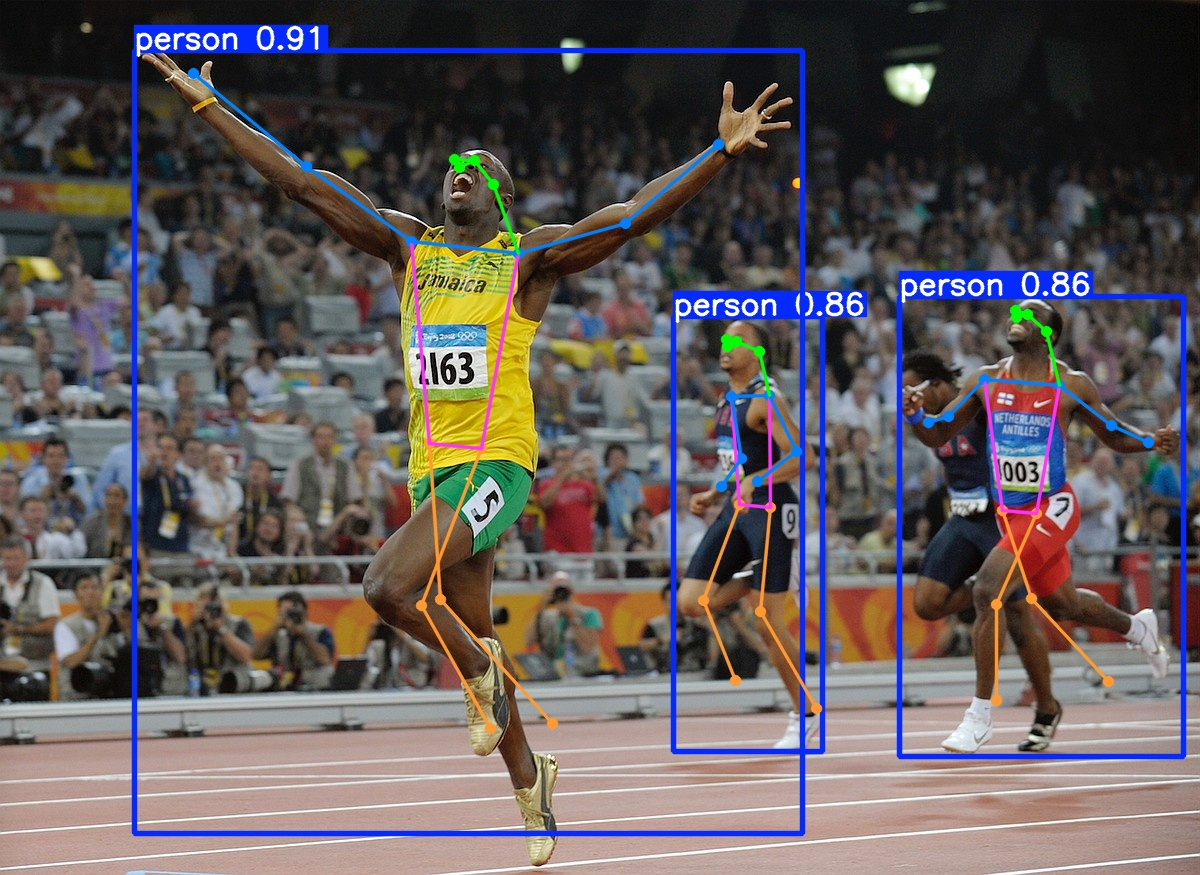

In [5]:
from google.colab import files
import cv2
import numpy as np
from IPython.display import Image, display

from ultralytics import YOLO
model = YOLO('yolo11n-pose.pt')
def process_uploaded_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        # Read the image
        image_bytes = uploaded[filename]
        nparr = np.frombuffer(image_bytes, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # Run inference
        results = model(img)

        # Plot results
        plotted = results[0].plot()

        # Save the result
        output_path = f'result_{filename}'
        cv2.imwrite(output_path, plotted)

        # Display the result
        display(Image(output_path))


# Function for processing uploaded video
def process_video_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        # Save the uploaded video
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        # Process the video
        cap = cv2.VideoCapture(filename)

        # Get video properties
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(cap.get(cv2.CAP_PROP_FPS))

        # Create video writer
        output_filename = f'result_{filename}'
        out = cv2.VideoWriter(output_filename,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (width, height))

        while cap.isOpened():
            success, frame = cap.read()
            if not success:
                break

            # Run inference
            results = model(frame)

            # Plot results
            plotted = results[0].plot()

            # Write frame
            out.write(plotted)

        cap.release()
        out.release()

        print(f"Video saved as {output_filename}")

# Example usage - uncomment the function you want to use
# Process an uploaded image
#print("Upload an image to process:")
#process_uploaded_image()

# Process an uploaded video
print("Upload a image to process:")
process_uploaded_image()